# OSM Traces (GPX files)

<img align="right" src="https://movingpandas.github.io/movingpandas/assets/img/movingpandas.png">

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/movingpandas/movingpandas-examples/main?filepath=2-analysis-examples/osm-traces.ipynb)
[![IPYNB](https://img.shields.io/badge/view-ipynb-hotpink)](https://github.com/movingpandas/movingpandas-examples/blob/main/2-analysis-examples/osm-traces.ipynb)
[![HTML](https://img.shields.io/badge/view-html-green)](https://movingpandas.github.io/movingpandas-website/2-analysis-examples/osm-traces.html)

This notebook illustrates the use of [GPS traces shared publicly by OSM community members](https://www.openstreetmap.org/traces) in GPX format. 


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas 
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, dim
from os.path import exists
from urllib.request import urlretrieve

import warnings
warnings.filterwarnings('ignore')

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))
hvplot_defaults = {'tiles':None, 'cmap':'Viridis', 'colorbar':True}

mpd.show_versions()


MovingPandas 0.17.2

SYSTEM INFO
-----------
python     : 3.9.18 (main, Sep 11 2023, 08:38:23)  [Clang 14.0.6 ]
executable : /opt/anaconda3/bin/python
machine    : macOS-10.16-x86_64-i386-64bit

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.6.4
GDAL data dir: /opt/anaconda3/lib/python3.9/site-packages/fiona/gdal_data
PROJ       : 9.2.1
PROJ data dir: /opt/anaconda3/lib/python3.9/site-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.2
pandas     : 2.1.4
fiona      : 1.9.4.post1
numpy      : 1.24.3
shapely    : 2.0.1
rtree      : 1.0.1
pyproj     : 3.6.0
matplotlib : 3.8.4
mapclassify: None
geopy      : 2.4.1
holoviews  : 1.18.3
hvplot     : 0.10.0
geoviews   : 1.12.0
stonesoup  : None


## Download OSM traces and generate a GeoDataFrame

In [2]:
def get_osm_traces(page=0, bbox='16.18,48.09,16.61,48.32'):
    file = 'osm_traces.gpx'
    url = f'https://api.openstreetmap.org/api/0.6/trackpoints?bbox={bbox}&page={page}'
    if not exists(file):
        urlretrieve(url, file)
    gdf = gpd.read_file(file, layer='track_points')
    # OPTIONAL: dropping empty columns
    gdf.drop(columns=['ele', 'course', 'speed', 'magvar', 'geoidheight', 'name', 'cmt', 'desc',
       'src', 'url', 'urlname', 'sym', 'type', 'fix', 'sat', 'hdop', 'vdop',
       'pdop', 'ageofdgpsdata', 'dgpsid'], inplace=True) 
    return gdf

## TrajectoryCollection from OSM traces GeoDataFrame

In [3]:
gdf = get_osm_traces()
osm_traces = mpd.TrajectoryCollection(gdf, 'track_fid', t='time')
print(f'The OSM traces download contains {len(osm_traces)} tracks')

The OSM traces download contains 4 tracks


In [4]:
for track in osm_traces: print(f'Track {track.id}: length={track.get_length(units="km"):.2f} km')

Track 0: length=22.66 km
Track 1: length=3.24 km
Track 2: length=3.48 km
Track 3: length=2.32 km


<Axes: >

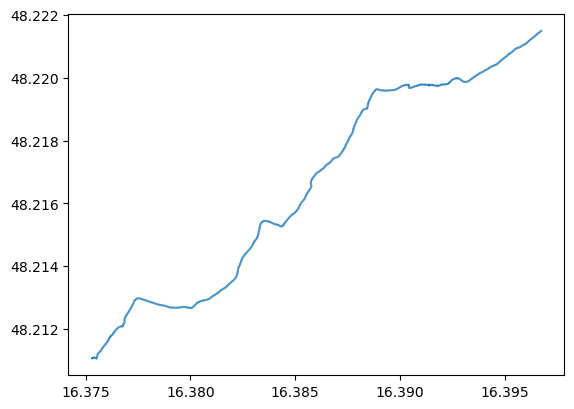

In [5]:
track.plot()

## Generalizing and visualizing

Generalization is optional but speeds up rendering

In [6]:
osm_traces = mpd.MinTimeDeltaGeneralizer(osm_traces).generalize(tolerance=timedelta(minutes=1))
osm_traces.hvplot(title='OSM Traces', line_width=7, width=700, height=400)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Path.I     :Path   [Longitude,Latitude]
   .Path.II    :Path   [Longitude,Latitude]
   .Path.III   :Path   [Longitude,Latitude]
   .Path.IV    :Path   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.II  :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.III :Points   [Longitude,Latitude]   (triangle_angle)
   .Points.IV  :Points   [Longitude,Latitude]   (triangle_angle)

In [7]:
osm_traces.get_trajectory(0).add_speed(overwrite=True, units=("km","h"))
osm_traces.get_trajectory(0).hvplot(
    title='Speed (km/h) along track', c='speed', cmap='RdYlBu',
    line_width=7, width=700, height=400, tiles='CartoLight', colorbar=True)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]   (speed,triangle_angle)

## Continue exploring MovingPandas

1. [Bird migration analysis](bird-migration.ipynb)
1. [Ship data analysis](ship-data.ipynb)
1. [Horse collar data exploration](horse-collar.ipynb)
1. [OSM traces](osm-traces.ipynb)
1. [Soccer game](soccer-game.ipynb)
1. [Mars rover & heli](mars-rover.ipynb)